[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Dataset loaded for lemmatization
Vocabulary size BEFORE lemmatization: 250347
Vocabulary size AFTER lemmatization: 241588


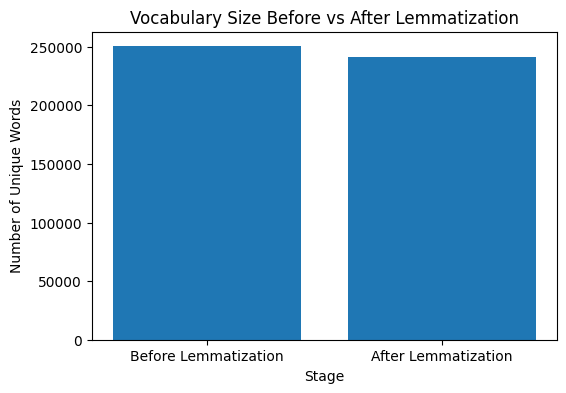

Lemmatized dataset saved as: suicide_detection_lemmatized.csv


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download("wordnet")
nltk.download("omw-1.4")

input_file = "suicide_detection_stopword_removed.csv"
df = pd.read_csv(input_file)

print("Dataset loaded for lemmatization")

df["text"] = df["text"].astype(str)

def get_vocabulary(text_series):
    vocab = set()
    for text in text_series:
        vocab.update(text.split())
    return vocab

vocab_before = get_vocabulary(df["text"])
vocab_size_before = len(vocab_before)

print("Vocabulary size BEFORE lemmatization:", vocab_size_before)

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text"] = df["text"].apply(lemmatize_text)

vocab_after = get_vocabulary(df["text"])
vocab_size_after = len(vocab_after)

print("Vocabulary size AFTER lemmatization:", vocab_size_after)


plt.figure(figsize=(6,4))
plt.bar(
    ["Before Lemmatization", "After Lemmatization"],
    [vocab_size_before, vocab_size_after]
)
plt.title("Vocabulary Size Before vs After Lemmatization")
plt.ylabel("Number of Unique Words")
plt.xlabel("Stage")
plt.show()


output_file = "suicide_detection_lemmatized.csv"
df.to_csv(output_file, index=False)

print("Lemmatized dataset saved as:", output_file)

